In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

Констнты для оператора

Функции операторов - возвращают двумерный numpy массив

In [20]:
def second_derivative_operator(size, dx):
  matrix = np.eye(size)
  i,j=np.indices(matrix.shape)
  matrix[i==j]=-2
  matrix[i==j-1]=1
  matrix[i==j+1]=1
  matrix=matrix/dx/dx
  return matrix

In [21]:
def full_operator(size, dt, dx, g = 10, H = 1000):
  return np.eye(size)-g*H*dt*second_derivative_operator(size,dx)

Функции методов, возвращают numpy массив err_log, в котором на i-м месте лежат два-нормы ошибки на i-м шаге алгоритма

In [130]:
def sg_method(start_point, matrix, right_part, iter_number, er=0.000001):
  size = len(start_point)
  assert np.shape(matrix)[0] == size
  assert np.shape(matrix)[0] == np.shape(matrix)[1]
  assert len(right_part) == size

  real_answer = np.linalg.inv(matrix)@right_part

  err_log = np.zeros(iter_number)
  A=matrix
  b=right_part
  x=start_point
  r=b-A@x
  p=r

  for i in range(iter_number):

    err_log[i]=np.linalg.norm(x-real_answer,2)

    Ap=A@p
    alpha=(r@r)/((Ap)@p)
    x=x+alpha*p
    rnew=r-alpha*Ap
    beta=(rnew@rnew)/(r@r)
    p=rnew+beta*p
    r=rnew
    if(r@r<er):
      break

  return err_log

In [131]:
def jacobi_method(start_point, matrix, right_part, iter_number):
  size = len(start_point)
  assert np.shape(matrix)[0] == size
  assert np.shape(matrix)[0] == np.shape(matrix)[1]
  assert len(right_part) == size

  real_answer = np.linalg.inv(matrix)@right_part

  err_log = np.zeros(iter_number)

  D    = matrix*np.eye(size)
  LpU  = matrix-D

  Dinv=D
  i,j=np.indices(Dinv.shape)
  Dinv[i==j]=1/Dinv[i==j]

  x=start_point

  for i in range(iter_number):
    err_log[i]=np.linalg.norm(x-real_answer,2)
    x=(right_part-(LpU)@x)@Dinv

  return err_log

Функция отрисовки логов
- принимает в себя массив логов одинакового размера
- рисует пнг файл со сходимостями в директории

In [136]:
def logs_draw(logs, labels, dt, dx, method_step, write_flag, log_flag, start, end):
  for i in range(len(logs)):
    log=logs[i]
 #   mean_speed = np.mean(log[:-1]/log[1:])
    plt.plot(range(len(log[start:end])), log[start:end], label=labels[i])

  plt.title("dt = " + str(dt) + " dx = " + str(dx))
  plt.xlabel("iteration number")
  if(log_flag == 0):
    plt.ylabel(r"$||x_{calc}-x_{real}||^2$")
  if(log_flag == 1):
    plt.ylabel(r"$\log||x_{calc}-x_{real}||^2$")
    plt.yscale('log')


  #getting time
  from datetime import datetime
  now = datetime.now()
  current_time = now.strftime("%H:%M:%S")

  plt.legend()
  if (write_flag == 1):
    filename = "comparison test " + str(current_time)+" dt = " + str(dt) + " dx = " + str(dx) + "step = " + str(method_step)+".png"
    plt.savefig(filename)

Функция основного теста :
- Вход это размер матрицы,шаг по времени, шаг по пространству, шаг по времени, шаг итерационного процесса, количество итераций, начальную точку
- На выходе рисует в директорию картинки сходимости и пишет на них среднюю скорость сходимости

In [144]:
def methods_test(method_step, start_point, right_part, size=100, dt=0.1, dx=0.1, iter_number = 10000, write_flag = 0, log_flag = 0, start=0, end = 1000):
  matrix = full_operator(size,dt,dx)

  sg_log = sg_method(start_point, matrix, right_part, iter_number)
  jacobi_log = jacobi_method(start_point, matrix,right_part, iter_number)

  labels=["Conjugate gradient method","Jacobi method"]
  logs = [sg_log, jacobi_log]
  logs_draw(logs, labels, dt, dx, method_step, write_flag, log_flag, start, end)

In [152]:
size = 100

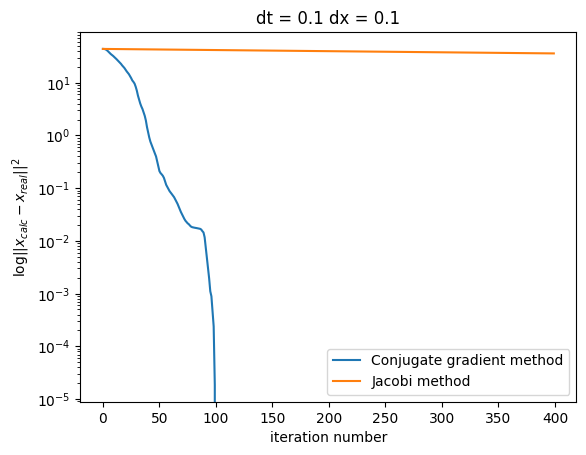

In [155]:
methods_test(method_step = 1, start_point = np.zeros(size), right_part = np.random.uniform(0.1, 1000, size), iter_number=1000,write_flag = 0, log_flag = 1, end = 400, size = size)

# Новый раздел